In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import spacy

import re
from bs4 import BeautifulSoup

In [11]:
nlp = spacy.load('de_core_news_md') ##loading german lang medium model in spacy

In [2]:
df = pd.read_excel("C:\\AA-Classes\\Z\\data.xlsx")

In [4]:
df.head()

,id,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification
0,15,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE
1,20,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE
2,24,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE
3,45,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE
4,49,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH


In [6]:
df.Text[0]

'Ich habe meinen Vater bis zu seinem Tode gepflegt und ihn bis zum letzten Moment begleitet. Dank der Unterstützung meiner Frau konnte ich mir die nötige Zeit nehmen, mir entsprechende (technische) Fähigkeiten aneignen und eben auch für ihn da sein. Das Ergebnis war - trotz langer und schwerer Krankheit - eine "weiche Landung" für ihn. Gelernt habe ich, dass Loyalität bis in den Tod - auch wenn das in unserer hedonistischen und bigotten Zeit verfemt ist - das größte Kompliment ist, dass man machen kann und die entsprechende Dankbarkeit (die Teil der Leistung ist, mit der man sich solche Loyalität VERDIENT) der größte Lohn ist, den man bekommen kann.\xa0'

In [4]:
df = df.drop('id',axis = 1)

In [8]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH


In [9]:
df.isnull().sum()

Geschlecht                                  0
Alter                                       0
Text                                        0
Extraversion_Classification                 0
Gewissenhaftigkeit_Classification           0
EmotionaleStabilitaet_Classification        0
Offenheit_Classification                    0
Empathie_Classification                     0
Wirksamkeitsueberzeugung_Classification     0
Optimismus_Classification                   0
Resilienz_Classification                    0
UnternehmerischesKapital_Classification     0
AgilityMindset_Classification               0
Machiavellismus_Classification              0
Narzissmus_Classification                   0
Psychopathie_Classification                 0
ZerstoererischesPotential_Classification    0
dtype: int64

In [5]:
 df = df.rename(columns={'Alter':'Jahr'})

In [6]:
from datetime import date

current_year = date.today().year
df['Alter'] = current_year - df['Jahr']

In [12]:
df.head()

,Geschlecht,Jahr,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alter
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47


In [7]:
def data_prep(x):
    x = [stopwords for stopwords in nlp(x) if not stopwords.is_stop]
    x = str(x).lower().replace('\\','').replace('_',' ')
    x = re.sub(r'[^\w ]+', "", x)                        # removes special characters
    x = BeautifulSoup(x, 'lxml').get_text().strip()      # removes html tags
    return x

In [14]:
data_prep("Ich habe meinen Vater bis zu seinem Tode gepflegt und ihn bis zum letzten Moment begleitet ")

'vater tode gepflegt letzten moment begleitet'

In [12]:
df['Text'] = df['Text'].apply(lambda x:data_prep(x))

In [17]:
df.Text[0]

'vater tode gepflegt letzten moment begleitet  unterstützung frau nötige nehmen  entsprechende  technische  fähigkeiten aneignen  ergebnis  trotz langer schwerer krankheit   weiche landung   gelernt  loyalität tod  hedonistischen bigotten verfemt  größte kompliment  entsprechende dankbarkeit  leistung  loyalität verdient  größte lohn  bekommen'

In [13]:
df['lemmatized'] = df['Text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [19]:
df.head()

,Geschlecht,Jahr,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alter,lemmatized
0,M,1972,vater tode gepflegt letzten moment begleitet ...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50,Vater Tod pflegen letzter Moment begleiten U...
1,F,1976,aufnahmeprüfung landesgymnasium musik bestande...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46,Aufnahmeprüfung Landesgymnasium Musik bestehen...
2,F,1966,sohn kindertagen adhs diagnostiziert mühe anst...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56,Sohn kindertag Adhs diagnostizieren mühe Anstr...
3,F,1966,größter erfolg trotz erkrankung erstaunlich ...,AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56,groß Erfolg trotz Erkrankung erstaunlich i...
4,M,1975,siebeneinhalb wohnungen gekauft bewohne selbe...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47,siebeneinhalb Wohnung kaufen bewohnen selber...


In [20]:
df.lemmatized[0] 

'Vater Tod pflegen letzter Moment begleiten   Unterstützung Frau nötig nehmen   entsprechend   technisch   Fähigkeit aneignen   Ergebnis   trotz lang schwer Krankheit    weich Landung    lernen   Loyalität Tod   hedonistisch bigotten verfemen   groß Kompliment   entsprechend Dankbarkeit   Leistung   Loyalität verdienen   groß Lohn   bekommen'

#### Age distribution by Gender

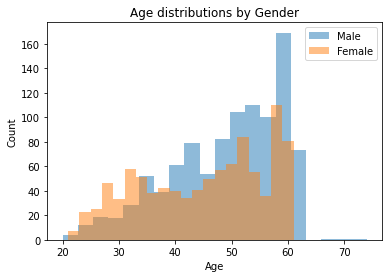

In [14]:
plt.hist(df[df['Geschlecht']=='M']['Alter'], alpha=0.5, label="Male", bins=20)
plt.hist(df[df['Geschlecht']=='F']['Alter'], alpha=0.5, label="Female", bins=20)
plt.title("Age distributions by Gender")
plt.ylabel("Count")
plt.xlabel("Age")
plt.legend()
plt.show()

#### Extraversion Classification  vs Gender

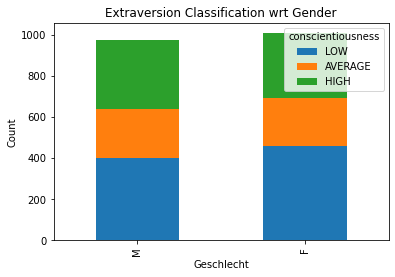

In [168]:
df.groupby([ 'Geschlecht','Extraversion_Classification']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks([0,1], ['M', 'F'])
plt.ylabel("Count")
plt.title("Extraversion Classification wrt Gender")
plt.legend(title = 'conscientiousness', labels =['LOW', 'AVERAGE','HIGH'])
plt.show()

#### Conscientiousness classification base on Age

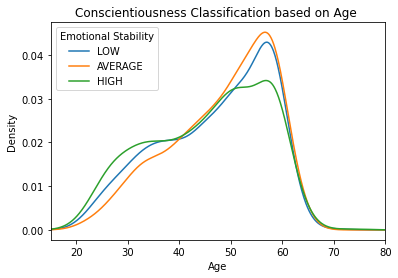

In [169]:
df.groupby('Gewissenhaftigkeit_Classification')['Alter'].plot(kind='density')
plt.xlim(15,80)
plt.title("Conscientiousness Classification based on Age ")
plt.legend(title = 'Emotional Stability', labels =['LOW','AVERAGE', 'HIGH']) # add label names
plt.xlabel('Age')
plt.show()
# min age-20
# max age-74

#### Group plots to analysis which parameter has highest effect

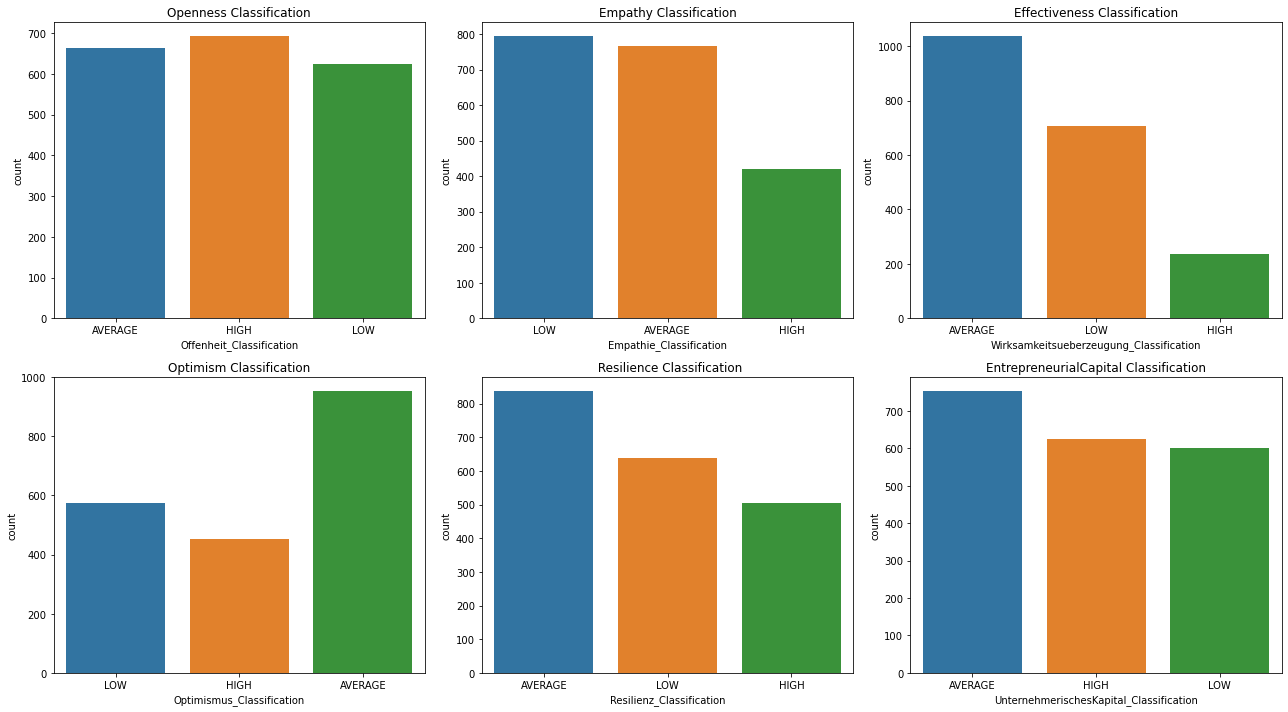

In [173]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

sns.countplot(x='Offenheit_Classification', data = df, ax = axes[0,0])
axes[0, 0].set_title('Openness Classification')

sns.countplot(x='Empathie_Classification', data = df, ax = axes[0,1])
axes[0, 1].set_title('Empathy Classification')

sns.countplot(x='Wirksamkeitsueberzeugung_Classification', data = df, ax = axes[0,2])
axes[0, 2].set_title('Effectiveness Classification')

sns.countplot(x='Optimismus_Classification', data = df, ax = axes[1,0])
axes[1, 0].set_title('Optimism Classification')

sns.countplot(x='Resilienz_Classification', data = df, ax = axes[1,1])
axes[1, 1].set_title(' Resilience Classification')

sns.countplot(x='UnternehmerischesKapital_Classification', data = df, ax = axes[1,2])
axes[1, 2].set_title('EntrepreneurialCapital Classification')


plt.tight_layout()
plt.show()

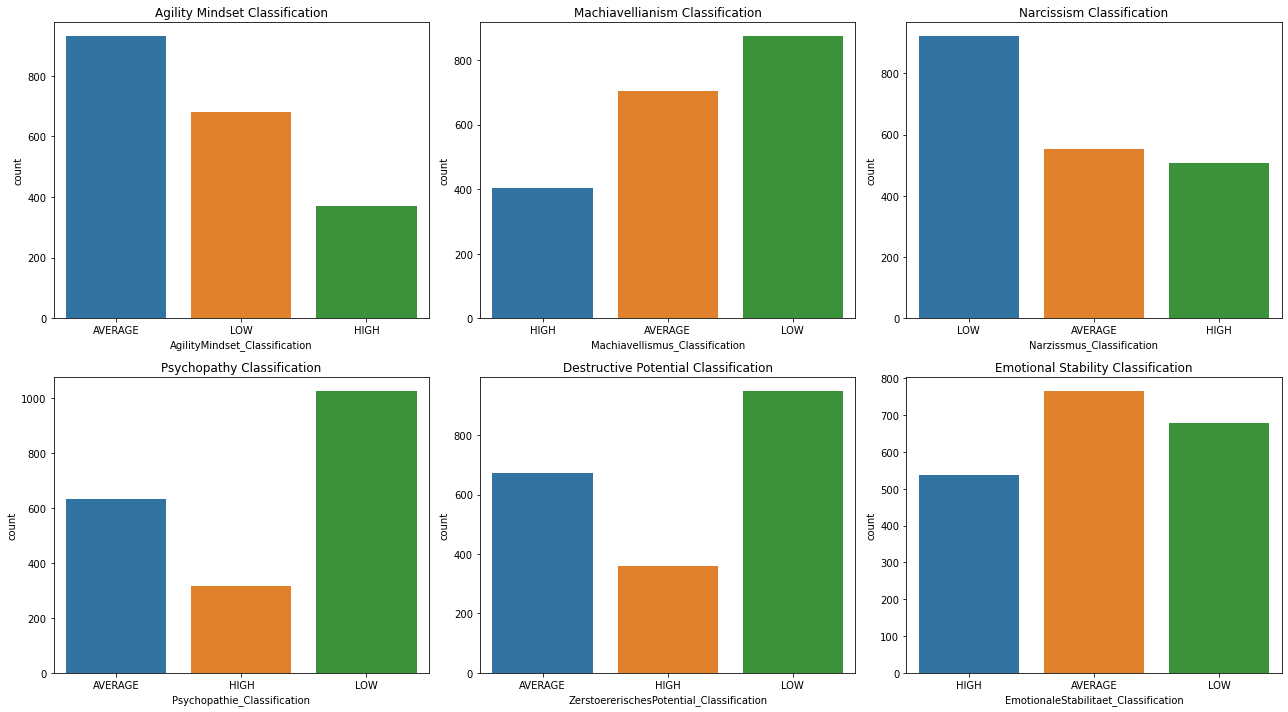

In [171]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

sns.countplot(x='AgilityMindset_Classification', data = df, ax = axes[0,0])
axes[0, 0].set_title('Agility Mindset Classification')

sns.countplot(x='Machiavellismus_Classification', data = df, ax = axes[0,1])
axes[0, 1].set_title('Machiavellianism Classification')

sns.countplot(x='Narzissmus_Classification', data = df, ax = axes[0,2])
axes[0, 2].set_title('Narcissism Classification')

sns.countplot(x='Psychopathie_Classification', data = df, ax = axes[1,0])
axes[1, 0].set_title('Psychopathy Classification')

sns.countplot(x='ZerstoererischesPotential_Classification', data = df, ax = axes[1,1])
axes[1, 1].set_title('Destructive Potential Classification')

sns.countplot(x='EmotionaleStabilitaet_Classification', data = df, ax = axes[1,2])
axes[1, 2].set_title('Emotional Stability Classification')

plt.tight_layout()
plt.show()

In [15]:
## Sentence Embedding using SentenceBERT
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [16]:
l_text = list(df['Text'])

In [17]:
## Encoding the sentences
sentence_embeddings = sbert_model.encode(l_text)

In [18]:
## K-Means clustering
from sklearn.cluster import KMeans

no_clusters = 5
model = KMeans(n_clusters=no_clusters)
model.fit(sentence_embeddings)
clustering = model.labels_

In [19]:
clustering

array([1, 1, 1, ..., 1, 4, 4])

In [20]:
cluster_df = pd.DataFrame(l_text, columns = ['l_text'])
cluster_df['cluster'] = clustering

In [21]:
cluster_df.head()

,l_text,cluster
0,vater tode gepflegt letzten moment begleitet ...,1
1,aufnahmeprüfung landesgymnasium musik bestande...,1
2,sohn kindertagen adhs diagnostiziert mühe anst...,1
3,größter erfolg trotz erkrankung erstaunlich ...,0
4,siebeneinhalb wohnungen gekauft bewohne selbe...,2


In [22]:
no_clusters = 5
clustered_set = [[] for i in range(no_clusters)]
for sentence_id, cluster_id in enumerate(clustering):
    clustered_set[cluster_id].append(l_text[sentence_id])
    

In [23]:
from wordcloud import WordCloud

In [24]:
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['l_text'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    

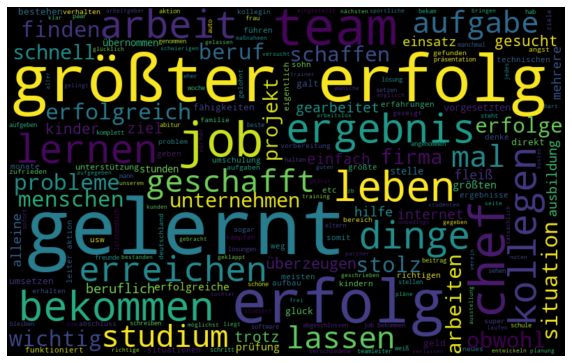

In [25]:
word_cloud(cluster_df,0)

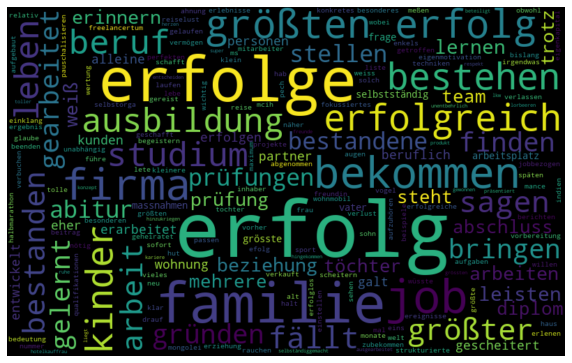

In [54]:
word_cloud(cluster_df,2)

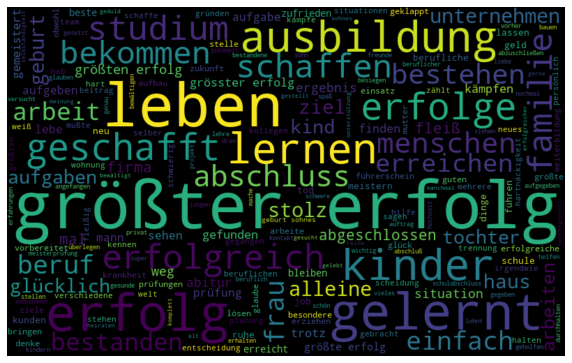

In [55]:
word_cloud(cluster_df,3)

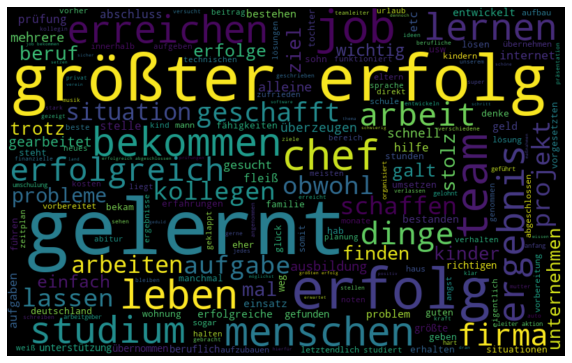

In [56]:
word_cloud(cluster_df,4)